In [1]:
import pandas as pd
import numpy as np
import hashlib as hl
import matplotlib.pyplot as plt
import math
from sklearn.cross_validation import train_test_split
%matplotlib inline

/home/naman/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('/Users/narayani/Desktop/IIITB/Sem6/ML/ML_Project/Housing_Logistic Regression/data/D3.csv')  #Reading the data

#print data

In [3]:
data.head() #Getting acquainted with the data

print data.head()

   Unnamed: 0         1         2         3         4         5         6  7
0           0  0.195798  0.274106 -0.939997  0.028068  0.044240  0.013813  1
1           1  0.309739  0.264959 -0.913133  0.002043  0.006119  0.002161  1
2           2  0.264859  0.245184 -0.918893  0.112745  0.106892  0.035098  0
3           3  0.337062  0.320293 -0.885321  0.001099  0.002505  0.001011  1
4           4  0.351365  0.304930 -0.885185  0.001344  0.002241  0.001036  1


In [4]:
data.info() #Getting Information about the data (i.e data type etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 8 columns):
Unnamed: 0    2254 non-null int64
1             2254 non-null float64
2             2254 non-null float64
3             2254 non-null float64
4             2254 non-null float64
5             2254 non-null float64
6             2254 non-null float64
7             2254 non-null int64
dtypes: float64(6), int64(2)
memory usage: 140.9 KB


In [5]:
filter_data = data.drop(data.columns[0], axis=1) #removing first column containing redundancy 
data1 = filter_data.copy()
#print data1
#print data1[data1.columns[6]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b2020e750>,
      dtype=object)

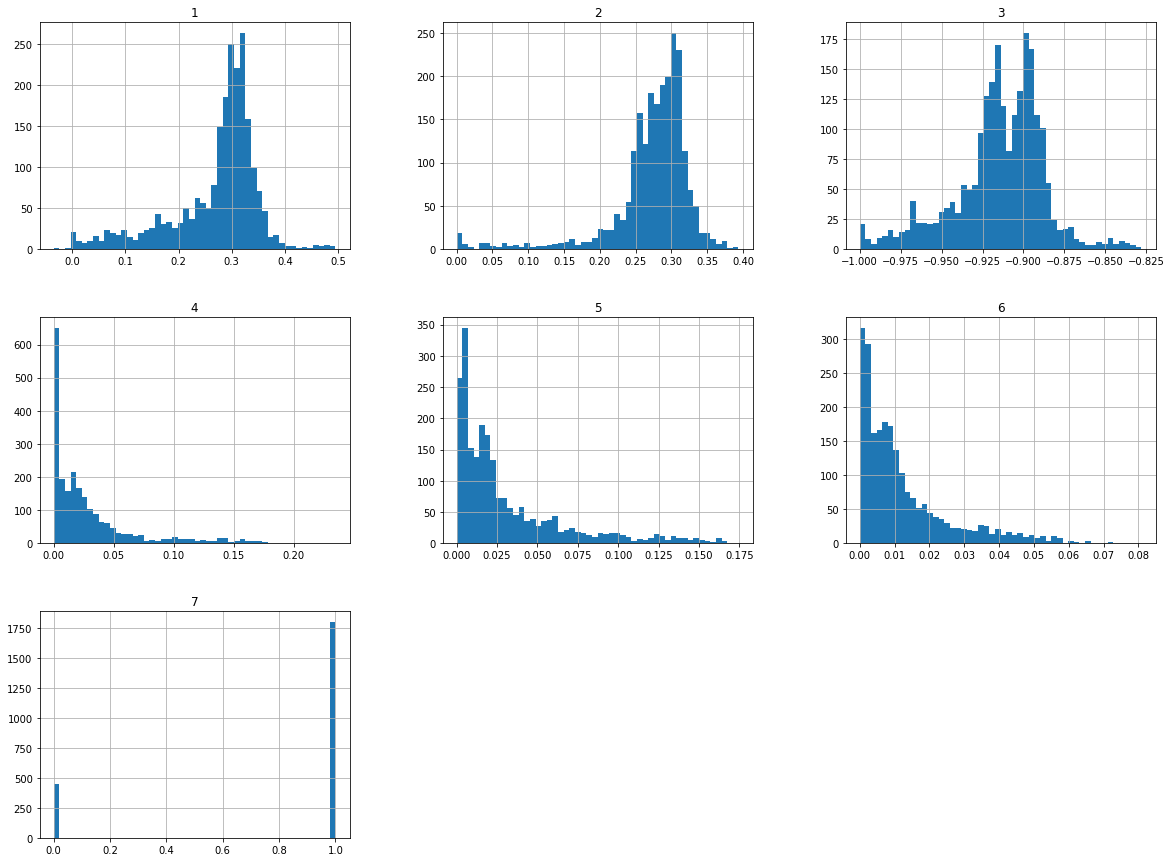

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
filter_data.hist(bins=50, figsize=(20,15)) #Plotting 

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(filter_data, test_size=0.2, random_state = 42)

In [8]:
data2 = train_set.copy()

In [10]:
corr_matrix = data2.corr()

In [11]:
corr_matrix[filter_data.columns[6]].sort_values(ascending=False)

7    1.000000
2    0.118042
1    0.094585
3    0.000354
5   -0.412024
6   -0.427688
4   -0.429977
Name: 7, dtype: float64

/home/naman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b1be76550>,
      dtype=object)

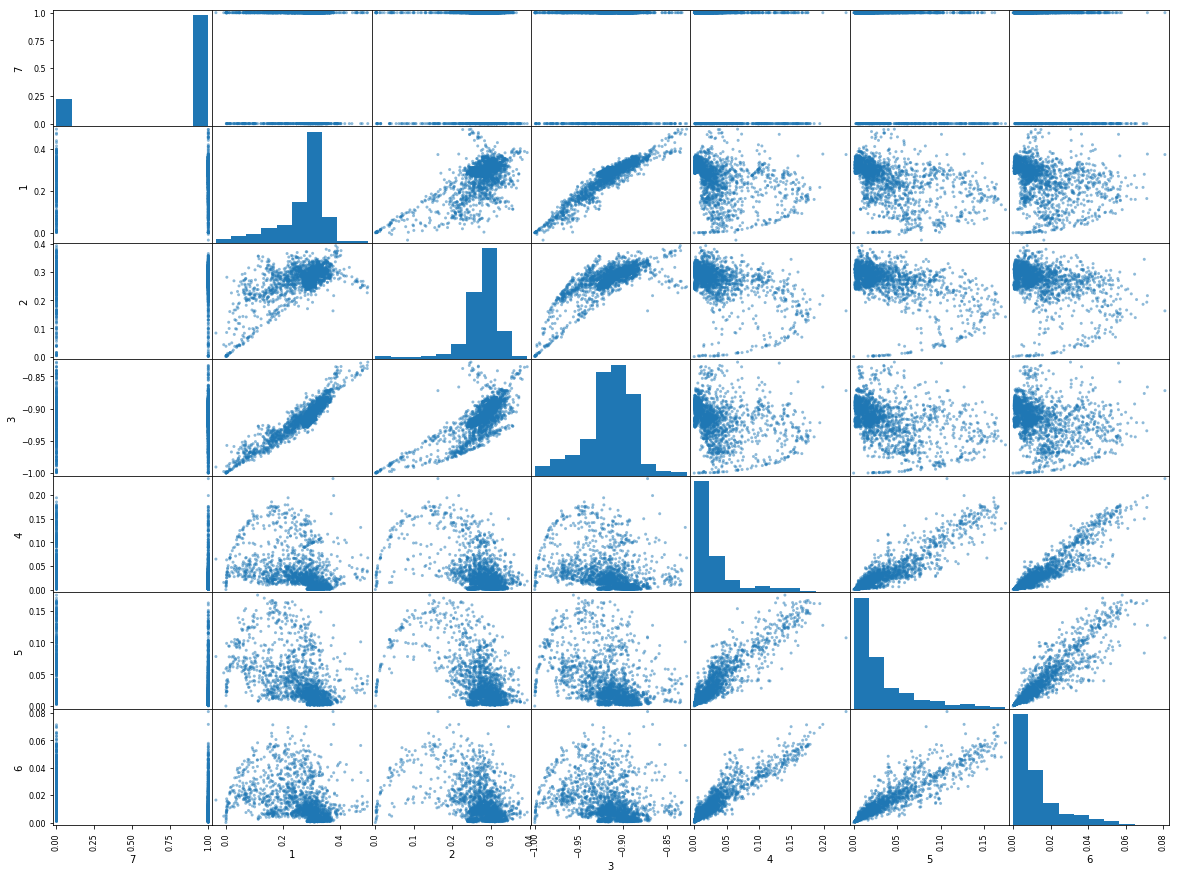

In [12]:
from pandas.tools.plotting import scatter_matrix

attributes = [ filter_data.columns[6],filter_data.columns[0],filter_data.columns[1],filter_data.columns[2],filter_data.columns[3],filter_data.columns[4],filter_data.columns[5]]
scatter_matrix(data1[attributes], figsize=(20, 15))

# Naive Bayes

In [13]:
def ProbY(traindata): #Getting the Probaility of each label (as seen from training data): P(Label)
#print traindata['species'].value_counts()
    values = traindata[traindata.columns[6]].value_counts().keys().tolist()
    counts = traindata[traindata.columns[6]].value_counts().tolist()
    #print values
    #print counts
    total=float(sum(counts))
    for i in range(len(counts)):
        counts[i]=float(counts[i])/total
        #print "P("+str(values[i])+"): "+str(counts[i])
    return (values,counts)

In [14]:
#print len(traindata['species'])
def SeparateData(Y,traindata): #Separating the data according to labels
    return (traindata.loc[traindata[traindata.columns[6]] == Y])

In [15]:
def Gaussian(Y,traindata):#Get Gaussian curve for a given Label (i.e getting standard deviation and mean information for each feature for that particular label)
    sep= SeparateData(Y,traindata)
   # print type(sep)
    #sepM=sep.as_matrix()
    #print sep[sep.columns[6]]
    sepM=sep.drop(sep.columns[6],axis=1)
    #print "ABC"
   # print sepM
    des= sepM.describe()
    #des.drop(des.columns[6])
    #print des
   # print Y
    stdev= des.loc['std']
    mean=des.loc['mean']
  #  print stdev
  #  print "STDEV of "+Y+": "+str(stdev)
  #  print "MEAN of "+Y+": "+str(mean)
    return (stdev,mean)
#def getSummary(data):

In [16]:
#conditional probability calculation of p(x|y)
def calcProbability(x,stdev,mean,py): #Getting Probability of each label
    #print "IN CALCPROB"
    p=1.0
    #print stdev[0]
    #print x[0]
    #print mean[0]
    #print len(stdev)
    for i in range(len(stdev)):
        #print i
        #print stdev[i]
        #print x[i]
        #print mean[i]
        #print "END"
       # print i
       # print "mean: "+str(mean[i])+" stdev: "+str(stdev[i]) mean etc correct
        p= ((1.0/(stdev[i]*math.sqrt(2*3.14)))* (math.exp(-(x[i]-mean[i])*(x[i]-mean[i])/(2*stdev[i]*stdev[i]))))*p
        #print p
   # print p
    return p*py

In [17]:
def Accuracy(Actual,Predicted): #calculating the accuracy by matching actual and predicted labels for a set of feature values
    count=0
    for i in range(len(Actual)):
        if(Actual[i]==Predicted[i]):
            count=count+1
    acc=(float(count)/float(len(Actual)))*100.0
    print "Percentage Accuracy: "+str(acc)

In [24]:
def main():
    train_set, test_set = train_test_split(data1, test_size=0.1, random_state=42)#splitting into training and test data
    traindata= train_set.copy() #making a copy of training data, to avoid making changes to original
    label,pY= ProbY(traindata) #Getting the probability for a particular label
    stdevAll=[]
    meanAll=[]
    for i in range(len(label)): #obtaining stdev and mean for all features, for a particular label
         #print label[i]
         stdev,mean=Gaussian(label[i],traindata) 
         #print stdev
         stdevAll.append(stdev)#appending aa stdev into an array
         meanAll.append(mean) #appending aa mean into an array
    
    #print label
    testdata=[]
    op_predicted=[]
    op_actual=[]
    op_pred_prob = []
    for i in range(len(test_set)): #Getting an array of values of features from training data
        testdata.append([test_set[test_set.columns[0]].iloc[i],test_set[test_set.columns[1]].iloc[i],test_set[test_set.columns[2]].iloc[i],test_set[test_set.columns[3]].iloc[i],test_set[test_set.columns[4]].iloc[i],test_set[test_set.columns[5]].iloc[i]])
        #print testdata[i]
    for j in range(len(testdata)):
        p=[]
        for i in range(len(label)): #calculating probaility of a particular label
            p.append(calcProbability(testdata[j],stdevAll[i],meanAll[i],pY[i]))
        index=0
        max=p[0]
        #print len(p)
        #Therefore p contains probabilities of each label
        for i in range(len(p)-1):#finding max probability and savings its index
            op_pred_prob.append(p[0])
            if(max<p[i+1]): 
                index=i+1
        
        #print "Actual: "+ str(test_set[test_set.columns[6]].iloc[j])+" Predicted: "+str(label[index])
        #Predicted label is label at index with max probability
        op_actual.append(test_set[test_set.columns[6]].iloc[j])
        op_predicted.append(label[index])
    Accuracy(op_actual,op_predicted)  #Printing accuracy
    from sklearn import metrics
    confusion = metrics.confusion_matrix(op_actual,op_predicted)
    TP = confusion[1,1] # True Positive
    TN = confusion[0,0] # True Negative
    FP = confusion[0,1] # False Positive
    FN = confusion[1,0] # False Negative
       # print "Predicted: "+label[index]
    
    # Precision tells us that when a positive value is predicted, how often is the prediction incorrect
    precision = (TP) / float(TP + FP)
    print ("Precision = " + str(precision))
    
    #recall(also known as sensitivity or true positive rate) tells us that when the actual value is positive, how often is the prediction correct.
    recall = (TP) / float(TP + FN)
    print ("Recall = " + str(recall))
    
    #F-measure(also known as F1-score or balanced F-score) is a measure of a test's accuracy. It considers both the precision and the recall of the test to compute the score.
    #F-measure = 2*(precision*recall)/(precision+recall)
    f_measure = 2* (precision*recall)/float((precision+recall))
    print ("F-measure = " + str(f_measure))
    
    #AUC is the percentage of the ROC plot that is underneath the curve. AUC is useful as a single number summary of classifier performance 
    auc = metrics.roc_auc_score(op_actual,op_pred_prob)
    print ("AUC = " + str(auc))
    
    
   
   # print test_set.iloc[0]
        
        
    #print stdevAll
    #print mean
    #print label
    #print pY
    

In [25]:
main()

Percentage Accuracy: 81.4159292035
Precision = 0.9106145251396648
Recall = 0.8624338624338624
F-measure = 0.8858695652173914
AUC = 0.7919347919347919
